In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [4]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(['RowNumber','CustomerId'],axis = 1, inplace =True)

In [7]:
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [8]:
tenure_exited = df[df.Exited == 1].Tenure
tenure_not_exited = df[df.Exited==0].Tenure

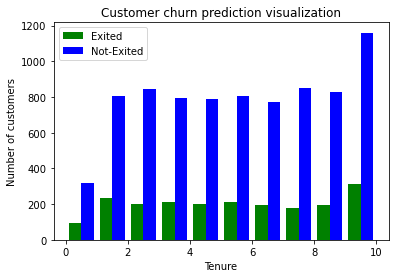

In [9]:
plt.xlabel("Tenure")
plt.ylabel("Number of customers")
plt.title("Customer churn prediction visualization")

plt.hist([tenure_exited, tenure_not_exited], color=['green','blue'],label=['Exited','Not-Exited'])
plt.legend()

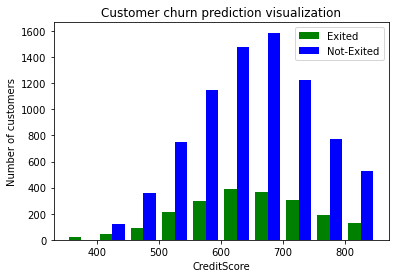

In [10]:
Creditscore_exited = df[df.Exited == 1].CreditScore
Creditscore_not_exited = df[df.Exited==0].CreditScore


plt.xlabel("CreditScore")
plt.ylabel("Number of customers")
plt.title("Customer churn prediction visualization")

plt.hist([Creditscore_exited, Creditscore_not_exited], color=['green','blue'],label=['Exited','Not-Exited'])
plt.legend()

In [14]:
def print_unique_col_values(df):
    for col in df:
        if df[col].dtypes=='object':
            print(f"{col}:{df[col].unique()}")

In [15]:
print(print_unique_col_values(df))

Surname:['Hargrave' 'Hill' 'Onio' ... 'Kashiwagi' 'Aldridge' 'Burbidge']
Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']
None


In [16]:
df.drop("Surname", axis=1, inplace=True)

In [18]:
print(print_unique_col_values(df))

Geography:['France' 'Spain' 'Germany']
Gender:['Female' 'Male']
None


In [21]:
df['Gender'].replace({'Female':1,'Male':0}, inplace=True)

In [22]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [27]:
df1 = pd.get_dummies(data=df,columns=['Geography'])
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [26]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [33]:
cols_to_scale=['CreditScore','Age','Balance','EstimatedSalary','Tenure','NumOfProducts']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df1[cols_to_scale] = scaler.fit_transform(df1[cols_to_scale])

In [34]:
df1.sample(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6961,0.790,1,0.202703,0.1,0.000000,0.333333,1,1,0.872180,0,1,0,0
4393,0.850,1,0.270270,0.6,0.716970,0.333333,0,0,0.765628,0,0,1,0
5833,0.612,1,0.418919,0.9,0.386981,0.000000,1,0,0.373834,1,0,1,0
9954,0.590,0,0.364865,0.6,0.619445,0.000000,0,1,0.017190,0,1,0,0
5490,0.610,1,0.810811,0.2,0.000000,0.333333,0,1,0.942209,0,0,0,1
6836,0.730,0,0.324324,0.6,0.000000,0.333333,1,1,0.643732,0,0,0,1
8785,1.000,0,0.121622,0.1,0.403663,0.333333,1,1,0.131281,0,0,1,0
3630,0.612,0,0.378378,0.9,0.571017,0.333333,0,0,0.965531,0,1,0,0
7001,0.662,0,0.405405,0.5,0.556857,0.333333,0,0,0.365311,0,0,1,0
3765,0.982,0,0.121622,0.8,0.000000,0.000000,1,0,0.859638,0,1,0,0


In [35]:
for col in df1:
    print(f"{col}:{df1[col].unique()}")

CreditScore:[0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.43

In [36]:
X = df1.drop("Exited",axis =1)
y = df1.Exited

In [38]:
X.shape

(10000, 12)

In [39]:
y.shape

(10000,)

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [41]:
X_train.shape

(8000, 12)

In [50]:
import tensorflow as tf
from tensorflow import keras

In [51]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(12,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])

In [52]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
model.fit(X_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 699us/step - loss: 0.4769 - accuracy: 0.7989
Epoch 2/100
250/250 [==============================] - 0s 719us/step - loss: 0.4642 - accuracy: 0.8021
Epoch 3/100
250/250 [==============================] - 0s 721us/step - loss: 0.4542 - accuracy: 0.8046
Epoch 4/100
250/250 [==============================] - 0s 700us/step - loss: 0.4455 - accuracy: 0.8070
Epoch 5/100
250/250 [==============================] - 0s 723us/step - loss: 0.4370 - accuracy: 0.8105
Epoch 6/100
250/250 [==============================] - 0s 731us/step - loss: 0.4292 - accuracy: 0.8121
Epoch 7/100
250/250 [==============================] - 0s 737us/step - loss: 0.4219 - accuracy: 0.8155
Epoch 8/100
250/250 [==============================] - 0s 718us/step - loss: 0.4146 - accuracy: 0.81840s - loss: 0.4172 - accuracy: 
Epoch 9/100
250/250 [==============================] - 0s 838us/step - loss: 0.4076 - accuracy: 0.8238
Epoch 10/100
250/250 [=====================

250/250 [==============================] - 0s 821us/step - loss: 0.3353 - accuracy: 0.8605
Epoch 80/100
250/250 [==============================] - 0s 803us/step - loss: 0.3351 - accuracy: 0.8618
Epoch 81/100
250/250 [==============================] - 0s 712us/step - loss: 0.3352 - accuracy: 0.8604
Epoch 82/100
250/250 [==============================] - 0s 699us/step - loss: 0.3345 - accuracy: 0.8615
Epoch 83/100
250/250 [==============================] - 0s 828us/step - loss: 0.3347 - accuracy: 0.8612
Epoch 84/100
250/250 [==============================] - 0s 799us/step - loss: 0.3343 - accuracy: 0.8633
Epoch 85/100
250/250 [==============================] - 0s 802us/step - loss: 0.3342 - accuracy: 0.8601
Epoch 86/100
250/250 [==============================] - 0s 731us/step - loss: 0.3344 - accuracy: 0.8624
Epoch 87/100
250/250 [==============================] - 0s 742us/step - loss: 0.3342 - accuracy: 0.8625
Epoch 88/100
250/250 [==============================] - 0s 717us/step - loss:

In [55]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 920us/step - loss: 0.3338 - accuracy: 0.8625


[0.33376526832580566, 0.862500011920929]

In [56]:
y_pred = model.predict(X_test)

In [57]:
y_pred[:10]

array([[0.25843787],
       [0.2442413 ],
       [0.1201165 ],
       [0.05034766],
       [0.03824785],
       [0.88824934],
       [0.03414708],
       [0.09820807],
       [0.30944848],
       [0.9003596 ]], dtype=float32)

In [58]:
y_test[:10]

9394    0
898     1
2398    0
5906    0
2343    0
8225    1
5506    0
6451    0
2670    1
3497    1
Name: Exited, dtype: int64

In [59]:
yp =[]
for element in y_pred:
    if element>0.5:
        yp.append(1)
    else:
        yp.append(0)

In [64]:
yp[:10]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 1]

In [65]:
y_test[:10]

9394    0
898     1
2398    0
5906    0
2343    0
8225    1
5506    0
6451    0
2670    1
3497    1
Name: Exited, dtype: int64

In [67]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,yp))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1595
           1       0.77      0.46      0.57       405

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



Text(69.0, 0.5, 'Truth')

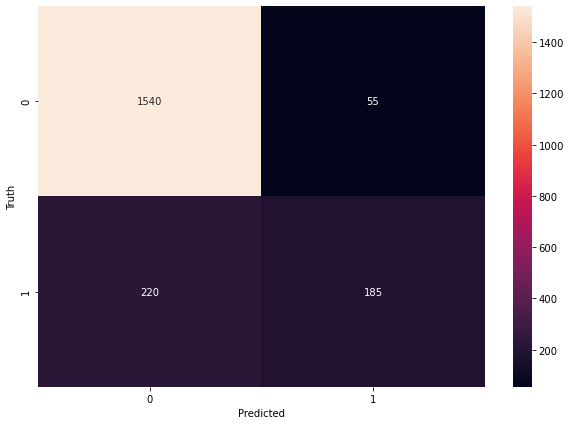

In [68]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test, predictions=yp)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')